# CAR_DATASET

JAYDEEP BHASKAR LANKE 


EMP ID: 2094072

Import libraries

In [8]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pylab import rcParams
import seaborn as sns 
from ipywidgets import interact

spark = SparkSession.builder.appName("Car_Data").getOrCreate()
#student_personal_data
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("C:/Users/2094072/Downloads/car_dataset/car_dataset.csv")
spark.sparkContext.setLogLevel("ERROR")
df.printSchema()
df.createOrReplaceTempView("Car_Data")

q1 = spark.sql("Desc Car_Data")
q1.show()


C:\Users\2094072\AppData\Local\Continuum\anaconda2\lib\site-packages\pyspark\context.py:227: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


root
 |-- carID: integer (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- tax: integer (nullable = true)
 |-- mpg: double (nullable = true)
 |-- engineSize: double (nullable = true)
 |-- price: integer (nullable = true)

+------------+---------+-------+
|    col_name|data_type|comment|
+------------+---------+-------+
|       carID|      int|   null|
|       brand|   string|   null|
|       model|   string|   null|
|        year|      int|   null|
|transmission|   string|   null|
|     mileage|      int|   null|
|    fuelType|   string|   null|
|         tax|      int|   null|
|         mpg|   double|   null|
|  engineSize|   double|   null|
|       price|      int|   null|
+------------+---------+-------+



### Q1. Total Count of Cars Brand Wise ?  

+--------+-----+
|   brand|Count|
+--------+-----+
|  toyota|  717|
|      vw| 1159|
|    audi|  523|
|     bmw|  978|
|   skoda|  638|
|    ford| 1196|
|vauxhall|  385|
|    merc| 1219|
|  hyundi|  817|
+--------+-----+



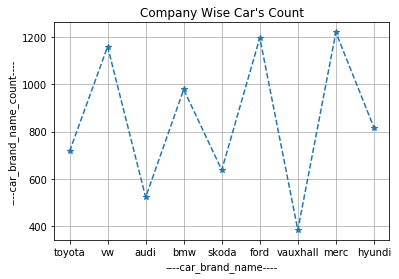

In [2]:
#Q1. Total Count of SellCars Brand Wise ?  

q1 = spark.sql("select brand,count(*)as Count from Car_Data Group by brand")
q1.show()

car_brand_name = [i[0] for i in q1.select("brand").collect()]
car_brand_name_count = [i[0] for i in q1.select("Count").collect()] 
 
    
plt.title("Company Wise Car's Count")
plt.ylabel("----car_brand_name_count----")
plt.xlabel("----car_brand_name----")     
plt.grid()    
#bar
#plt.bar(car_brand_name,car_brand_name_count,fc="BLUE",ec="black")
#plot
plt.plot(car_brand_name,car_brand_name_count,marker='*',linestyle = 'dashed')
plt.rcParams['figure.figsize']= 25,15
#pie
#plt.pie(car_brand_name_count,labels = car_brand_name,startangel = 90 )



plt.show()
           

### Q2.Which is most Popular model in merc ?

+----------+-----------+
|     model|model_Count|
+----------+-----------+
|   M Class|         79|
|   G Class|         15|
|   V Class|        207|
| GLS Class|         74|
|  GL Class|        121|
|   X-CLASS|         82|
|       CLK|          7|
|   S Class|        197|
| CLA Class|         86|
| CLS Class|        237|
|       SLK|         95|
| GLB Class|         19|
+----------+-----------+



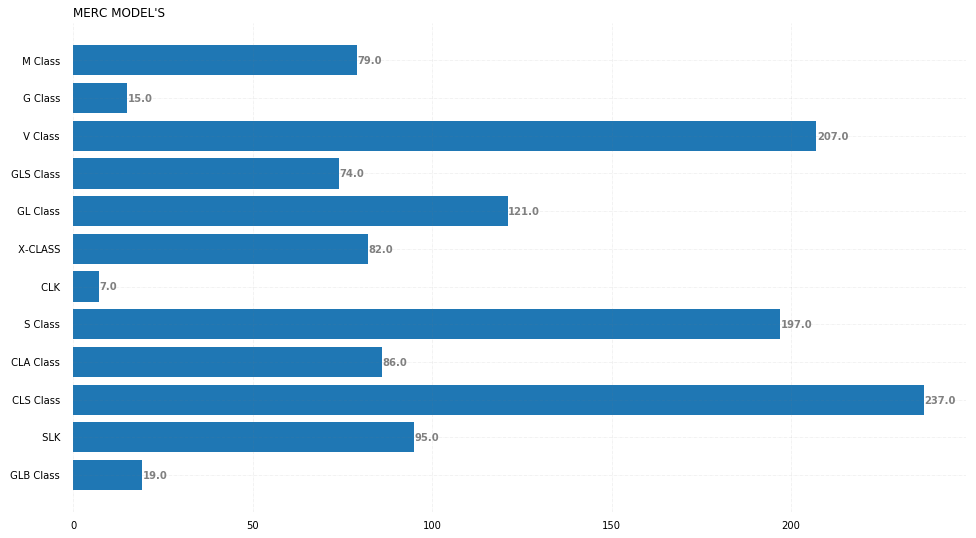

In [20]:
# Q2.Which is most Popular model in merc ?


q2=spark.sql("Select model,count(*) as model_Count  from car_data where brand = 'merc' group by model")
q2.show()
car_model_name = [i[0] for i in q2.select("model").collect()]
car_model_count = [i[0] for i in q2.select("model_Count").collect()]

name = car_model_name
price = car_model_count

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title("MERC MODEL'S",
			loc ='left', )



# Show Plot
plt.show()


### Q3.Create bot for Show  all model in one Brand ? 

Enter Brand Name ?bmw
+---------+-----------+
|    model|model_Count|
+---------+-----------+
|       X7|         55|
|       Z3|          7|
|       X6|        106|
|       X4|        179|
|       M4|        125|
|       i3|         43|
| 8 Series|         39|
| 6 Series|        108|
|       M3|         27|
|       M2|         21|
|       Z4|        108|
|       i8|         17|
| 7 Series|        106|
|       M5|         29|
|       M6|          8|
+---------+-----------+



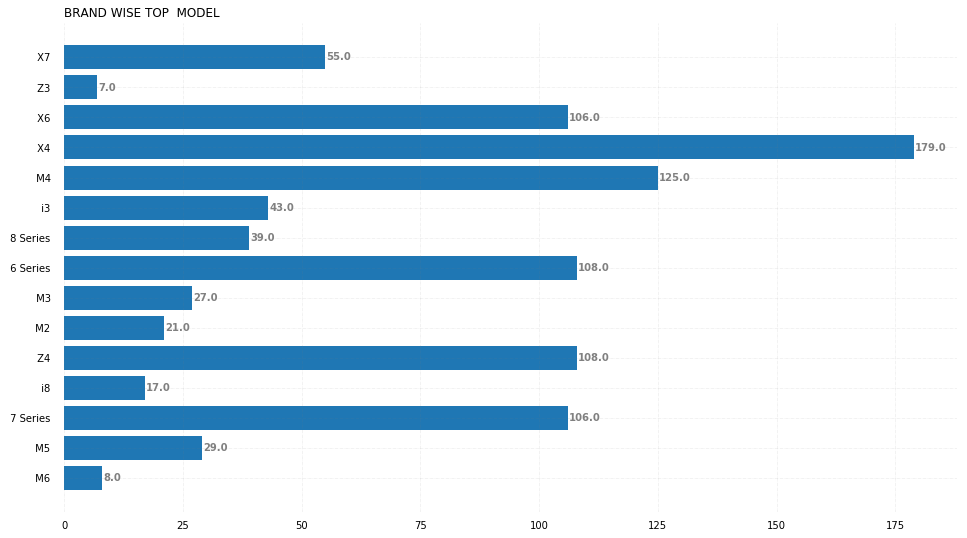

In [5]:
# Q3.Create bot for Show  all model in one Brand ?

bn=raw_input("Enter Brand Name ?")
s1 ="Select model,count(*) as model_Count  from car_data where brand = '{}' group by model"
s=s1.format(bn)
#print(s)
q3=spark.sql(s)
q3.show()
car_model_name = [i[0] for i in q3.select("model").collect()]
car_model_count = [i[0] for i in q3.select("model_Count").collect()]


name = car_model_name
price = car_model_count

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('BRAND WISE TOP  MODEL',
			loc ='left', )



# Show Plot
plt.show()





### Q.4 Compare Every  Brand Top Sell Model Cars count wise ?

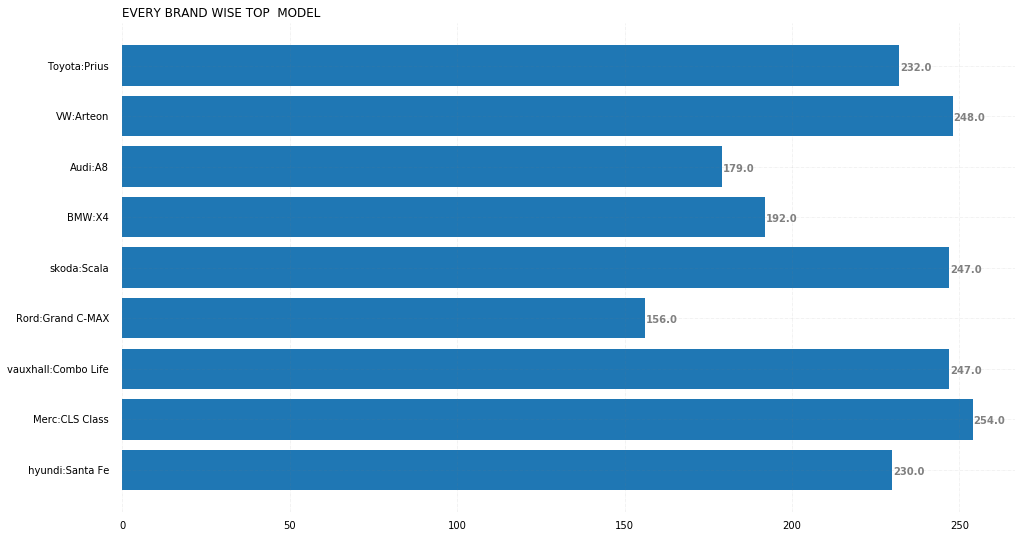

In [21]:
# q.4 Compare Every  Brand Top Sell Model Cars ?
cbn=["Toyota:Prius","VW:Arteon","Audi:A8","BMW:X4","skoda:Scala","Rord:Grand C-MAX","vauxhall:Combo Life","Merc:CLS Class"," hyundi:Santa Fe"]
cbnc=[232,248,179,192,247,156,247,254,230]

name = cbn
price = cbnc

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('EVERY BRAND WISE TOP  MODEL',
			loc ='left', )



# Show Plot
plt.show()











### Q5.mostly used FuelType ?

+--------+--------------+
|fuelType|Count_fuelType|
+--------+--------------+
|  Diesel|          4651|
|  Hybrid|           287|
|   Other|            36|
|Electric|             3|
|  Petrol|          2655|
+--------+--------------+



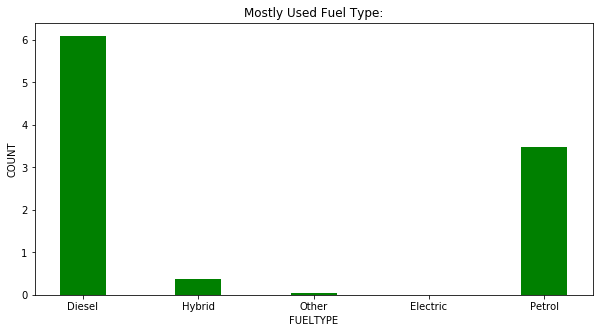

In [8]:
#Q5.mostly used FuelType ?
q5 = spark.sql("select fuelType,count(*)as Count_fuelType from Car_Data Group by FuelType")
q5.show()
ft=[i[0] for i in q5.select("fuelType").collect()]
cft=[i[0] for i in q5.select("Count_fuelType").collect()]
mylabels = ft
a = cft
b= []

for i in range (len(a)):
    z =a[i]/float(7632)
    b.append(z*10)

# plt.rcParams['figure.figsize']= 10,12
# plt.bar(ft,b,fc="BLUE",ec="black")

fig = plt.figure(figsize = (10, 5))
plt.bar(ft, b, color ='green',width = 0.4)
 
plt.xlabel("FUELTYPE")
plt.ylabel("COUNT")
plt.title("Mostly Used Fuel Type:")
plt.show()


### Q6.find which Engine Type is popular and compare different Engine Type with fuel type wise?

+----------+---------------+
|engineSize|engineSizeCount|
+----------+---------------+
|6.3       |1              |
|6.2       |1              |
|1.7       |1              |
|4.3       |1              |
|3.7       |1              |
|6.6       |2              |
|6.0       |2              |
|2.4       |2              |
|2.2       |3              |
|1.1       |4              |
|1.9       |5              |
|3.5       |7              |
|4.7       |8              |
|0.0       |9              |
|3.2       |12             |
|5.5       |14             |
|4.2       |21             |
|1.3       |22             |
|5.2       |22             |
|2.3       |24             |
|2.5       |37             |
|5.0       |47             |
|2.9       |48             |
|4.4       |60             |
|4.0       |80             |
|1.8       |107            |
|1.5       |151            |
|1.6       |174            |
|1.4       |282            |
|3.0       |316            |
|1.0       |383            |
|2.0       |38

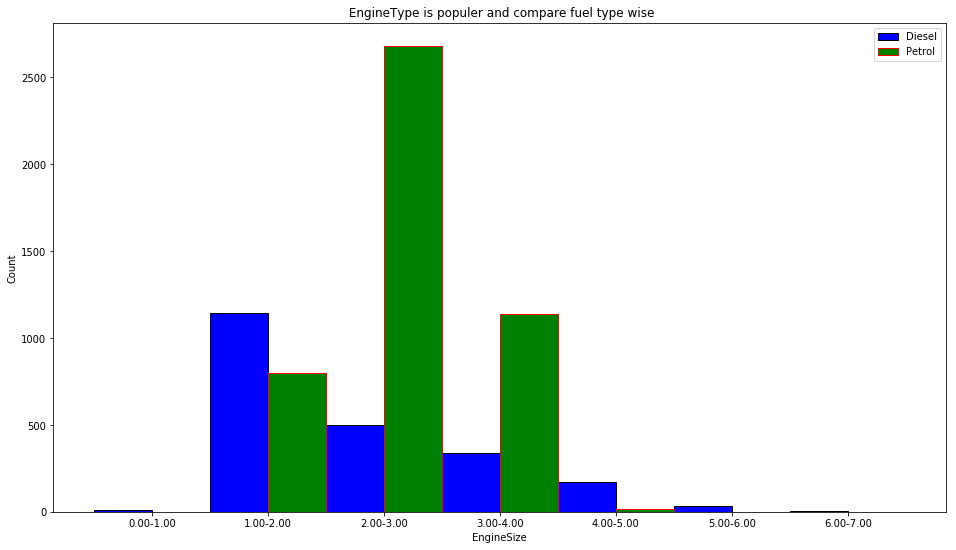

In [9]:
#Q6. find which Engine Type is popular and compare different Engine Type with fuel type?
import numpy as np
q1 = spark.sql("select engineSize,count(*)as engineSizeCount from Car_data where fueltype ='Petrol' group by engineSize order by engineSizeCount;" )
q1.show(110, truncate=False)
q2 = spark.sql("select engineSize,count(*)as engineSizeCount from Car_data where fueltype ='Diesel' group by engineSize order by engineSizeCount;" )
q2.show(110, truncate=False)

petrol=[9,1142,502,336,169,36,2]
Diesol=[0,799,2680,1136,17,0,0]
x=["0.00-1.00","1.00-2.00","2.00-3.00","3.00-4.00","4.00-5.00","5.00-6.00","6.00-7.00"]
w = 0.5
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]



plt.bar(bar1,petrol,w,fc="BLUE",ec="black",color='g',label="Diesel")
plt.bar(bar2,Diesol,w,fc="GREEN",ec="RED",color='c',label="Petrol")
plt.legend()
plt.rcParams['figure.figsize']= 10,10
plt.title(" EngineType is populer and compare fuel type wise")
plt.ylabel("Count")
plt.xlabel("EngineSize")
plt.xticks(bar1+w/2,x)
plt.show()









### Q7.Which is most Popular transmission

+------------+------------------+
|transmission|transmission_count|
+------------+------------------+
|   Semi-Auto|              2105|
|   Automatic|              2588|
|       Other|                 2|
|      Manual|              2937|
+------------+------------------+



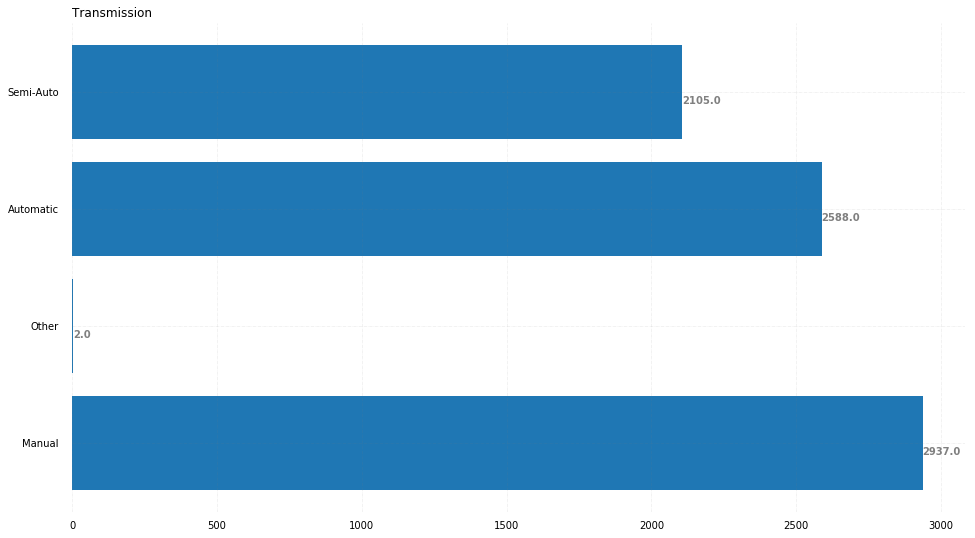

In [24]:
# Q7.Which is most Popular transmission 


q5=spark.sql("Select transmission,count(*) as transmission_count from car_data group by transmission")
q5.show()
tr=[i[0] for i in q5.select("transmission").collect()]
trc=[i[0] for i in q5.select("transmission_count").collect()]


name = tr
price = trc

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Transmission',
			loc ='left', )



# Show Plot
plt.show()



### Q.8find how many car's Manufacture in year's  and compare  petrol and Diesel wise count ?

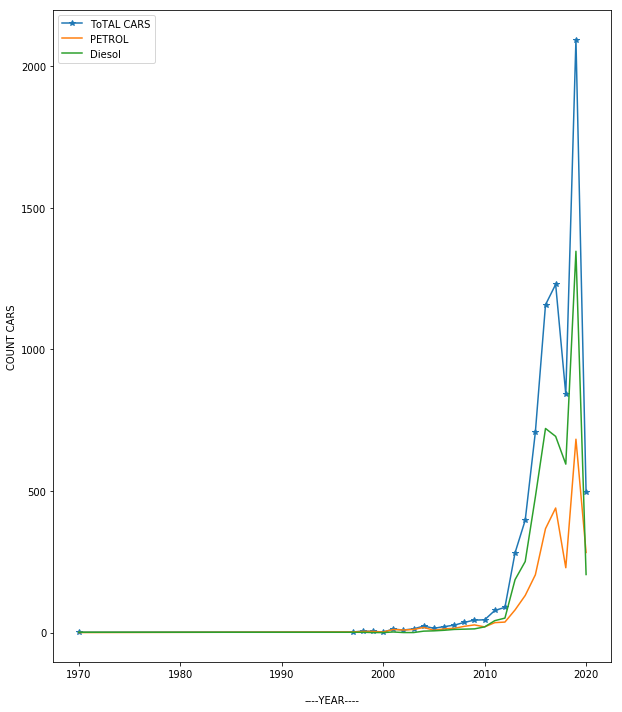

In [12]:
#Q8.find how many car's Manufacture in year's  and compare  petrol and Diesel wise count ?


# q8=spark.sql("Select year,count(*) as ybc from car_data group by year order by year")
# q9=spark.sql("Select year,count(*) as p from car_data where fueltype= 'Petrol' group by year  order by year")
# q10=spark.sql("Select year,count(*) as d from car_data where fueltype= 'Diesel' group by year  order by year")

# q8.show(30)
# q9.show(30)
# q10.show(30)

# year=[i[0] for i in q8.select("year").collect()]
# ybc1=[i[0] for i in q8.select("ybc").collect()]
# ybcp1=[i[0] for i in q9.select("p").collect()]
# ybcd1=[i[0] for i in q10.select("d").collect()]
# print(year)
# print(ybc1)
# print(ybcp1)
# print(ybcd1)

year = [1970, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
ybc=   [1, 2, 5, 4, 2, 12, 9, 13, 23, 15, 21, 26, 36, 44, 45, 78, 89, 282, 397, 708, 1158, 1230, 842, 2095, 495]
ybcp=  [0,2, 4, 4, 2, 11, 9, 11, 18, 8, 13, 15, 22, 27, 20, 35, 37, 80, 131, 204, 367, 440, 229, 683, 283]
ybcd = [1, 1, 1, 0, 0, 2,0, 0, 5, 6, 8, 11, 12, 13, 20, 42, 51, 187, 251, 479, 721, 693, 595, 1347, 205]



plt.plot(year,ybc,marker='*',label = "ToTAL CARS", linestyle="-")
plt.plot(year,ybcp,label = "PETROL", linestyle="-")
plt.plot(year,ybcd,label = "Diesol", linestyle="-")

plt.ylabel("COUNT CARS")
plt.xlabel("\n----YEAR----") 
plt.legend()
plt.show()














### Q9.Compare top Model AVG Brand wise?

+--------+-----+
|   brand|  avg|
+--------+-----+
|     bmw|470.8|
|  toyota|235.0|
|    merc|122.9|
|   skoda| 78.5|
|      vw| 70.6|
|vauxhall| 68.9|
|    ford| 68.9|
|  hyundi| 67.3|
|    audi| 62.8|
+--------+-----+



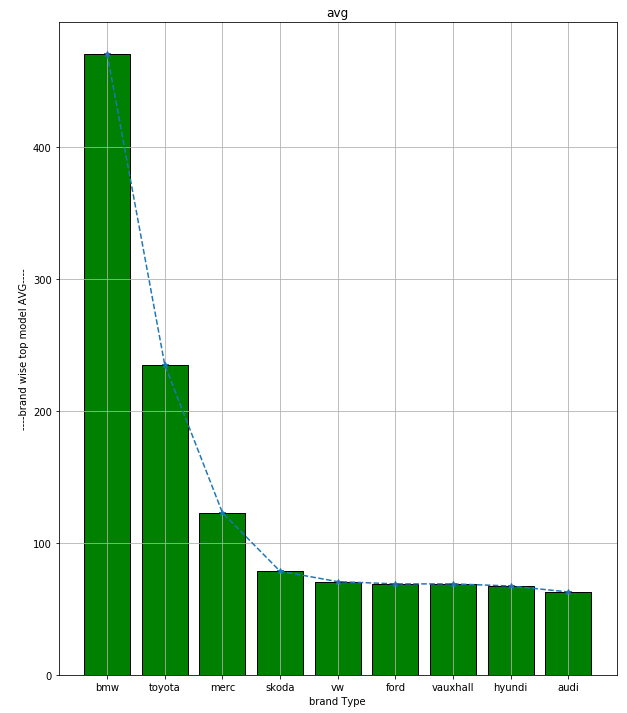

In [13]:
#Q9.Compare top Model AVG Brand wise?
q9 = spark.sql("select brand,max(mpg) as avg from car_data group by brand order by  avg desc ;")
q9.show(500)
brand=[i[0] for i in q9.select("brand").collect()]
trc=[i[0] for i in q9.select("avg").collect()]
plt.bar(brand,trc,fc="green",ec="black")
plt.plot(brand,trc,marker='*',linestyle = 'dashed')
plt.title("avg")
plt.xlabel("brand Type")
plt.ylabel("\n----brand wise top model AVG----")     
plt.grid() 
#plt.rcParams['figure.figsize']= 10,12
plt.show()

### Q10.Find the  Max tax and min tax compare  each brand wise?

+--------+----------------+---+
|   brand|      max(model)|tax|
+--------+----------------+---+
|      vw| Tiguan Allspace|  0|
|     bmw|              i8|  0|
|   skoda|            Yeti|  0|
|  toyota|           Verso|  0|
|  hyundi|        Santa Fe| 20|
|    merc|         X-CLASS| 20|
|vauxhall|   Zafira Tourer| 20|
|    ford|  Tourneo Custom| 20|
|    audi|             SQ7| 30|
+--------+----------------+---+

+--------+----------------+---+
|   brand|      max(model)|TAX|
+--------+----------------+---+
|   skoda|            Yeti|240|
|      vw| Tiguan Allspace|330|
|  hyundi|        Santa Fe|555|
|vauxhall|   Zafira Tourer|565|
|  toyota|           Verso|565|
|    merc|         X-CLASS|580|
|     bmw|              i8|580|
|    ford|  Tourneo Custom|580|
|    audi|             SQ7|580|
+--------+----------------+---+



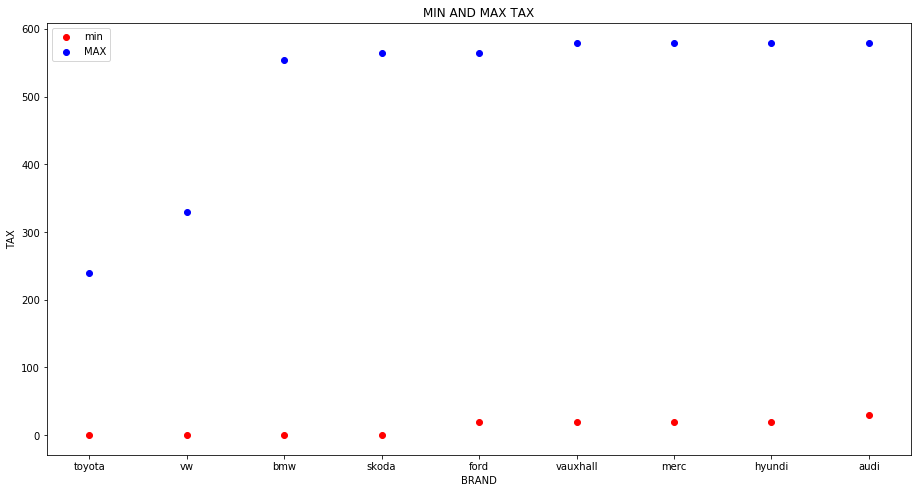

In [45]:
# Q10.Find Max tax each model compare with brand ?
q10 = spark.sql("select brand,max(model),min(tax)as tax from car_data group by brand order by  tax ;")
q10.show(500)
brand=[i[0] for i in q10.select("brand").collect()]
trc1=[i[0] for i in q10.select("tax").collect()]
# plt.bar(brand,trc,fc="pink",ec="black")
# plt.plot(brand,trc,marker='*',linestyle = 'dashed')
# plt.title("tax")
# plt.xlabel("brand Type")
# plt.ylabel("\n----brand wise top model tax----")     
# plt.grid() 
# #plt.rcParams['figure.figsize']= 10,12
# plt.show()

q101 = spark.sql("select brand,max(model),max(tax)as TAX from car_data group by brand order by  tax ;")
q101.show()
a = trc1
b=  trc =[i[0] for i in q101.select("tax").collect()]
z = brand
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(z, a, color='r',label="min")
ax.scatter(z, b, color='b',label="MAX")
ax.legend()
ax.set_xlabel('BRAND')
ax.set_ylabel('TAX')
ax.set_title('MIN AND MAX TAX')
plt.show()




### Search Bot

In [46]:

# SEARCH BOT
def Userinput():
    print("Lowest Price is 450$ Higst 159999$:::")
    L1 =int(input("Enter  lowest Price in $:"))
    h  =int(input("\nEnter  higst Price Price in $: "))
    #br =raw_input("Enter Brand name ?")
    print("\n We have available Transmissions:: \n   Manual, \n   Automatic,\n   Semi-Automatic ")
    tra=raw_input("Enter Transmission ?")
    print("We have available Fueltype \n   Petrol,\n   Diesel,\n   Electric,\n   Other")
    fult=raw_input("Enter FuelType")
    b = "select * from car_data where (price > {} and price < {}) and transmission ='{}' and fuelType= '{}' order by price "
    a = b.format(L1,h,tra,fult)
    #print(a)
    print("In Your Price Bond Range Cars:")
    
    q2 = spark.sql(a)
    q2.show(110, truncate=False)
    
    

UserInput()

Lowest Price is 450$ Higst 159999$:::
Enter  lowest Price in $:5555

Enter  higst Price Price in $: 10000

 We have available Transmissions:: 
   Manual, 
   Automatic,
   Semi-Automatic 
Enter Transmission ?Manual
We have available Fueltype 
   Petrol,
   Diesel,
   Electric,
   Other
Enter FuelTypeDiesel
In Your Price Bond Range Cars:
+-----+--------+----------------------+----+------------+-------+--------+---+----+----------+-----+
|carID|brand   |model                 |year|transmission|mileage|fuelType|tax|mpg |engineSize|price|
+-----+--------+----------------------+----+------------+-------+--------+---+----+----------+-----+
|17409|vauxhall| Antara               |2012|Manual      |63725  |Diesel  |240|42.8|2.2       |5695 |
|19591|hyundi  | IX35                 |2013|Manual      |91001  |Diesel  |150|48.7|1.7       |5698 |
|12432|skoda   | Yeti                 |2011|Manual      |93579  |Diesel  |200|46.3|2.0       |5699 |
|14709|hyundi  | IX20                 |2012|Manual     